# Exemplary workflow of CIDER

This notebook is an example of how you can use CIDER and what the different parameters of the functions do.  
For more details on the individual methods and their handling, please refer to the documentation.

## Setup  
The first step when using CIDER is to import CIDER and define a suitable name for calling.

In [1]:
from CIDER import ChemicalDatasetComparator
cider = ChemicalDatasetComparator()

## Class variables  
In CIDER there are some class variables that determine the names of the keys generated by the methods. Those keys are important to know for calling the values for inspection and after running a method CIDER will tell the name of the created keys.  
The class variables have predefined values but can be changed. Following are the class variables with their predefined values and the function that generates the key.

In [2]:
cider.import_keyname = "SDMolSupplier_Object" # cider.import_as_data_dict: 

cider.dataset_lenght_keyname = "number_of_molecules" # cider.get_number_of_molecules

cider.mol_grid_keyname = "molecule_picture" # cider.draw_molecules

cider.database_id_keyname = "coconut_id_keyname" # cider.get_database_id

cider.identifier_keyname = "identifier_list" # cider.get_identifier_list_key

cider.duplicates_keyname = "number_of_duplicates" # cider.get_duplicate_key
cider.duplicates_id_keyname = "duplicates" # cider.get_duplicate_key

cider.shared_mols_keyname = "number_of_shared_molecules" # cider.get_shared_molecules_key
cider.shared_mols_id_keyname = "shared_molecules" # cider.get_shared_molecules_key

cider.lipinski_list_keyname = "number_of_broken_Lipinski_Rules" # cider.get_lipinski_key
cider.lipinski_summary_keyname = "Lipinski_Rule_of_5_summary" # cider.get_lipinski_key

## Data import  
The second step is to choose the datasets you want to compare and import them as SDFiles.  
When using the import function, there will be a dictionary created which content will be updated with every subsequent function used. This main dictionary contains a sub-dictionary for every SDFile named after the SDFile name.  

In [3]:
testdict = cider.import_as_data_dict('data')

The main dictionary contains the names of the SDFiles as keys.  
The sub-dictionaries should always have the same keys, but the values of those keys can be different. As here shown, all sub-dictionaries have the 'SDMolSupplier_Object' key. The value for this key are the imported SDFiles.

In [4]:
testdict

{'set_chlorbenzene-5.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x23849c52e00>},
 'set_chlorbenzene.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x23849c525e0>},
 'set_phenole.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x23849c52c70>}}

## Data inspection  
As there might be faulty entries in the SDFiles and those might cause problems with the subsequent methods, the imported SDFiles can be inspected.

In [5]:
cider.check_invalid_SDF(testdict)

No invalid molecules found in set_chlorbenzene-5.sdf
No invalid molecules found in set_chlorbenzene.sdf
No invalid molecules found in set_phenole.sdf


By default the parameter of this method is 'delete=False'. That means the faulty entries will remain in the datasets. They can be deleted from the datasets to make sure that they do not cause problems by setting 'delete=True'.

## Overview dataset size  
To get an overview of the size of the datasets, the number of molecules in every dataset can be determined.  
The number will be displayed in line and will also be included as a new key in every sub-dictionary called 'number_of_molecules'.

In [6]:
cider.get_number_of_molecules(testdict)

Number of molecules in set_chlorbenzene-5.sdf: 50
Number of molecules in set_chlorbenzene.sdf: 100
Number of molecules in set_phenole.sdf: 100
Updated dictionary with 'number_of_molecules'


Now all the sub-dictionaries are updated with the key 'number_of_molecules' and the number of molecules can be accessed by this new key.

In [7]:
print(testdict['set_phenole.sdf'].keys())
print('Number of molecules in phenole set: ' + str(testdict['set_phenole.sdf']['number_of_molecules']))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules'])
Number of molecules in phenole set: 100


## Overview molecules (visualization of molecules)  
To get a visual overview over the molecules in the different datasets, the molecules can be plotted in a grid image.  
The number of plotted molecules and the number of molecules in one row can be specified, as well as the image size (with regard to the single molecule image).  
The image will be displayed in line and exported to an output folder.  

Updated dictionary with 'molecule_picture'


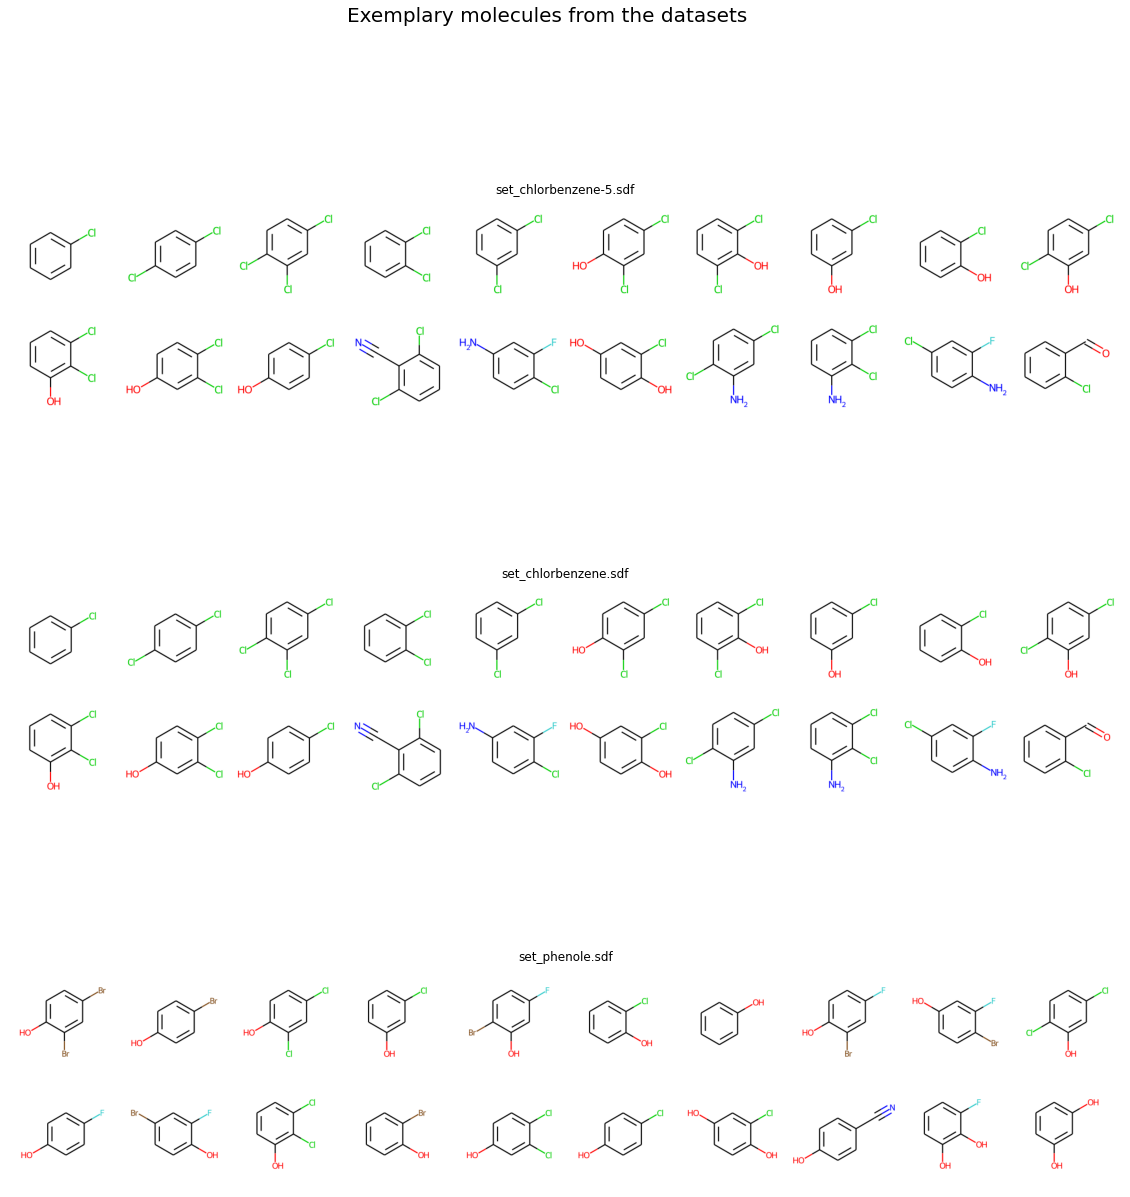

In [8]:
cider.draw_molecules(testdict, number_of_mols = 20, mols_per_row = 10)

## Get  Database ID  
When working with SDFiles exported from a database, it could be helpful to add the database ID for every molecule to the dictionary. For doing so, it is necessary to know how the ID is named in the SDFiles.

In [9]:
cider.get_database_id(testdict, 'coconut_id')

Updated dictionary with 'coconut_id_keyname'


(set_chlorbenzene-5.sdf    [CNP0009107, CNP0341270, CNP0206286, CNP028488...
 set_chlorbenzene.sdf      [CNP0009107, CNP0341270, CNP0206286, CNP028488...
 set_phenole.sdf           [CNP0216116, CNP0085593, CNP0401033, CNP010964...
 Name: coconut_id_keyname, dtype: object,
 None)

Again, after running the function all the sub-dictionaries are updated with a new key 'coconut_id_keyname' and can be accessed with this.  
(Remember: If not using the Coconut database ID, the key name (a class variable) can be changed according to the databse ID used.)

In [10]:
print(testdict['set_chlorbenzene.sdf'].keys())
print('First Coconut IDs for chlorbenzene set: ' + str(testdict['set_chlorbenzene.sdf']['coconut_id_keyname'][:5]))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname'])
First Coconut IDs for chlorbenzene set: ['CNP0009107', 'CNP0341270', 'CNP0206286', 'CNP0284887', 'CNP0080171']


## Get Chemical Identifier  
For the subsequent comparison, the molecules need a string representation as a chemical identifier. SMILES, InChI or InChIKey strings can be used here.  
Please note that a lot of methods from CIDER cannot be used if the chemical identifiers are missing. So remember to run the 'get_identifier_list_key' method before calling for any other comparison methods.

In [11]:
cider.get_identifier_list_key(testdict, 'smiles')

Updated dictionary with 'identifier_list'


(set_chlorbenzene-5.sdf    [Clc1ccccc1, Clc1ccc(Cl)cc1, Clc1ccc(Cl)c(Cl)c...
 set_chlorbenzene.sdf      [Clc1ccccc1, Clc1ccc(Cl)cc1, Clc1ccc(Cl)c(Cl)c...
 set_phenole.sdf           [Oc1ccc(Br)cc1Br, Oc1ccc(Br)cc1, Oc1ccc(Cl)cc1...
 Name: identifier_list, dtype: object,
 None)

As before all sub-dictionaries are now containin the new key 'identifier_list' and those lists can be accessed. 

In [12]:
print(testdict['set_chlorbenzene-5.sdf'].keys())
print('First SMILES strings for chlorbenzene-5 set: ' + str(testdict['set_chlorbenzene-5.sdf']['identifier_list'][:5]))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list'])
First SMILES strings for chlorbenzene-5 set: ['Clc1ccccc1', 'Clc1ccc(Cl)cc1', 'Clc1ccc(Cl)c(Cl)c1', 'Clc1ccccc1Cl', 'Clc1cccc(Cl)c1']


## Testing for duplicates  
Before further comparison between the datasets, it might be important to know if there are any duplicates in a single dataset and get the identifier for those duplicates.  
(Short reminder: This method cannot be used unless the 'get_identifier_list_key' method is run previously!)

In [13]:
cider.get_duplicate_key(testdict)

Number of duplicates in set_chlorbenzene-5.sdf: 0,  duplicates: set()
Number of duplicates in set_chlorbenzene.sdf: 0,  duplicates: set()
Number of duplicates in set_phenole.sdf: 2,  duplicates: {'O=Cc1ccc(O)cc1', 'O=Cc1ccccc1O'}
Updated dictionary with 'number_of_duplicates' and 'duplicates'


In the established way the new keys in the sub-dictionaries can be accessed.

In [14]:
print('There are ' + str(testdict['set_phenole.sdf']['number_of_duplicates']) + ' duplicates in the phenole set.')
print('SMILES strings for the duplicates: ' + str(testdict['set_phenole.sdf']['duplicates']) )

There are 2 duplicates in the phenole set.
SMILES strings for the duplicates: {'O=Cc1ccc(O)cc1', 'O=Cc1ccccc1O'}


## Comparison of molecules and visualization  
There might be molecules that are present in all the compared datasets. The number of these molecules and their identifier string can be extracted.  
Additionally, this intersection between the datasets can be visualized in a Venn diagram. The image will be displayed in line, and it will also be exported to the output folder. 

In [15]:
cider.get_shared_molecules_key(testdict)

Number of molecules that can be found in all datasets: 10, identifiers: {'Oc1ccc(O)c(Cl)c1', 'Oc1ccccc1Cl', 'Oc1cccc(Cl)c1', 'Oc1ccc(Cl)c(Cl)c1', 'Oc1ccc(Cl)cc1Cl', 'Oc1cccc(Cl)c1Cl', 'O=[N+]([O-])c1cc(Cl)ccc1O', 'Oc1cc(Cl)ccc1Cl', 'O=[N+]([O-])c1ccc(O)c(Cl)c1', 'Oc1ccc(Cl)cc1'}
Updated dictionary with 'number_of_shared_molecules' and 'shared_molecules'


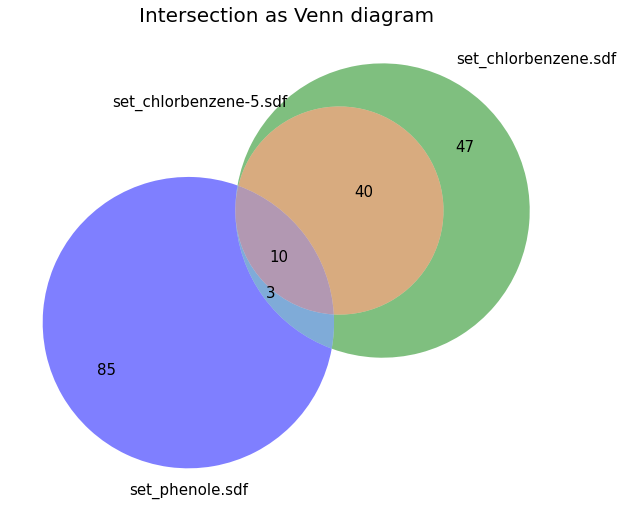

In [16]:
cider.visualize_intersection(testdict)

## Get Descriptor  
Besides the identity of the molecules, there are different descriptors to describe a molecule that can be compared. RDKit already has methods for calculating a lot of different descriptor values for molecules. After importing the RDKit methods, they can be called in CIDER and used to get the descriptor values for the molecules in the dataset.  
Other methods for calculating descriptor values might also work in CIDER after importing them, as long as they work on SDMolSupplier Objects.  
The name for the key under which the descriptor values are saved in the dictionary needs to be chosen.  
Following, there are examples of descriptors from RDKit run in the CIDER workflow.

In [17]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [18]:
cider.get_descriptor_list_key(testdict, Descriptors.MolWt, 'Molecular Weight')

Updated dictionary with 'Molecular Weight'


(set_chlorbenzene-5.sdf    [112.55899999999997, 147.00400000000002, 181.4...
 set_chlorbenzene.sdf      [112.55899999999997, 147.00400000000002, 181.4...
 set_phenole.sdf           [251.90499999999997, 173.009, 163.003, 128.557...
 Name: Molecular Weight, dtype: object,
 None)

In [19]:
cider.get_descriptor_list_key(testdict, rdMolDescriptors.CalcMolFormula, 'Molecular Formula')

Updated dictionary with 'Molecular Formula'


(set_chlorbenzene-5.sdf    [C6H5Cl, C6H4Cl2, C6H3Cl3, C6H4Cl2, C6H4Cl2, C...
 set_chlorbenzene.sdf      [C6H5Cl, C6H4Cl2, C6H3Cl3, C6H4Cl2, C6H4Cl2, C...
 set_phenole.sdf           [C6H4Br2O, C6H5BrO, C6H4Cl2O, C6H5ClO, C6H4BrF...
 Name: Molecular Formula, dtype: object,
 None)

In [20]:
cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')

Updated dictionary with 'Number of H-Donors'


(set_chlorbenzene-5.sdf    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...
 set_chlorbenzene.sdf      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...
 set_phenole.sdf           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 Name: Number of H-Donors, dtype: object,
 None)

In [21]:
cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')

Updated dictionary with 'Number of Rings'


(set_chlorbenzene-5.sdf    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 set_chlorbenzene.sdf      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 set_phenole.sdf           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
 Name: Number of Rings, dtype: object,
 None)

In [22]:
# cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')
# cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')
# cider.get_descriptor_list_key(testdict, Descriptors.NumHAcceptors, 'Number of H-Acceptors')
# cider.get_descriptor_list_key(testdict, Descriptors.Chi1, 'Chi Connectivity Indices')
# cider.get_descriptor_list_key(testdict, Descriptors.Kappa1, 'Kappa Shape Indices')

Taking a look at the sub-dictionary keys the calculated discriptor values can be found there as new keys.

In [23]:
print(testdict['set_phenole.sdf'].keys())

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates', 'duplicates', 'number_of_shared_molecules', 'shared_molecules', 'Molecular Weight', 'Molecular Formula', 'Number of H-Donors', 'Number of Rings'])


## Get descriptor value with database ID  
Using the database ID from a molecule it is possible to search in the dataset for a descriptor value for this molecule. Not only the descriptor value will be returned but also the sub-dictionary where the molecule was found.

In [24]:
cider.get_value_from_id(testdict, 'CNP0291002', 'Molecular Weight')

Molecule found in set_chlorbenzene-5.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998
Molecule found in set_chlorbenzene.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998
Molecule found in set_phenole.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998


## Descriptor binning and visualization  
As long as the descriptor values are integers or float numbers, the values can be plotted for a visual comparison. Descriptor values like the molecular formula can not be plotted.  
For continuous values such as the molecular weight, the interval size for the binning of the descriptor values can be chosen. If there is an interval size (widht_of_bins) given for a discrete descriptor, it will be ignored. 
The values used for plotting (intervals and number of moleculs from each dataset per intervall) will usually be exported into the output folder as csv files. This can be suppressed by changing 'save_dataframe' to False.  
Please note that only descriptors can be plotted that have been calculated before.

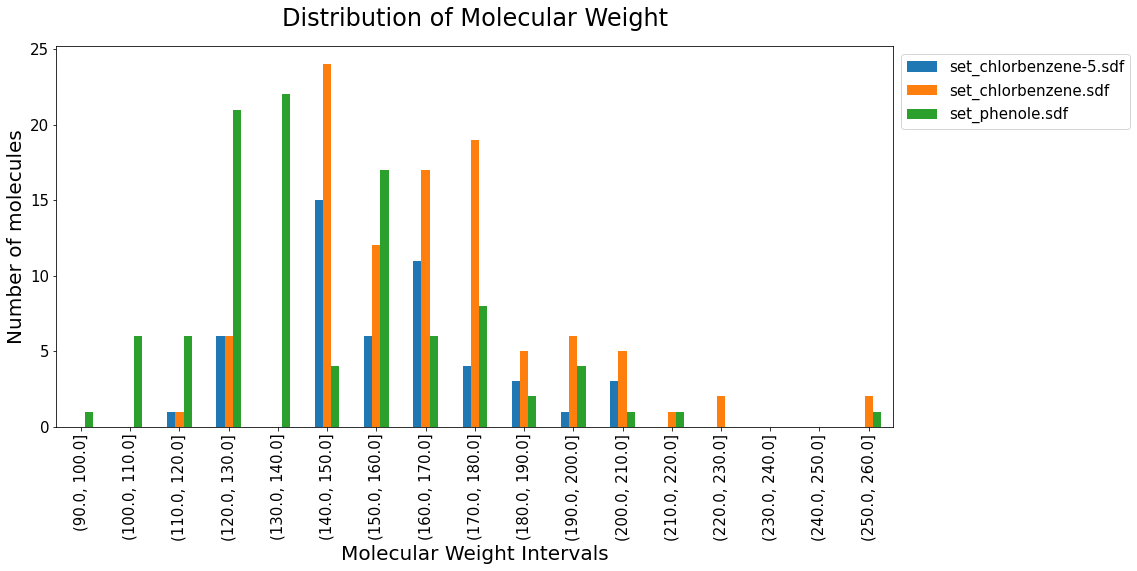

In [25]:
cider.descriptor_counts_and_plot(testdict, 'Molecular Weight', width_of_bins = 10)

The number of rings is a discrete descriptor and a given inteval size will be ignored. The plotting values will not be exported due to the parameter 'save_dataframe=False'.

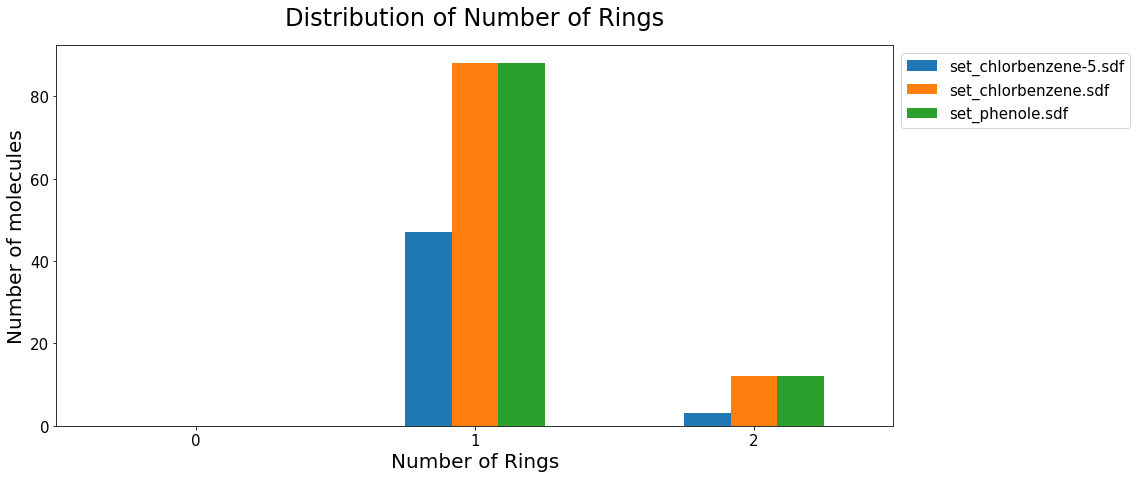

In [26]:
cider.descriptor_counts_and_plot(testdict, 'Number of Rings', width_of_bins = 10, save_dataframe=False)

## Lipinski Rules of 5 with visualization  
The Lipinski Rules of 5 include more than one descriptor. CIDER can check all the single descriptors of the Lipinski Rules and get the number of broken rules for every molecule. There will also be a summary for every dataset, how the molecules are distributed.

In [27]:
cider.get_lipinski_key(testdict)

Updated dictionary with 'Lipinski_Rule_of_5_summary' and 'number_of_broken_Lipinski_Rules'


(set_chlorbenzene-5.sdf    {'lipinski_molecules': 50, '1_rule_broken': 0,...
 set_chlorbenzene.sdf      {'lipinski_molecules': 100, '1_rule_broken': 0...
 set_phenole.sdf           {'lipinski_molecules': 100, '1_rule_broken': 0...
 Name: Lipinski_Rule_of_5_summary, dtype: object,
 None)

The distribution of the molecules in the datasets for the Lipinski Rules can be plotted comparable to the descriptor plots.

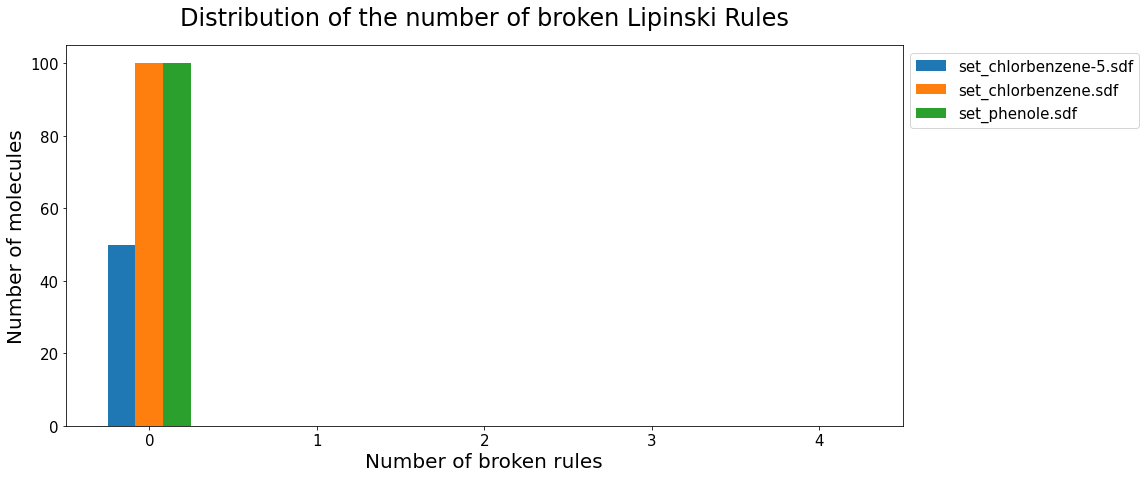

In [28]:
cider.lipinski_plot(testdict)

## Chemical Space Visualization  
Using ChemPlot the chemical space of the molecules can be visualized. Therefore, a chemical identifier is needed, but it does not matter if it is SMILES, InChI or InChIKey. ChemPlot will generate a fingerprint with a given fingerprint size (fp_bits) and radius (fp_radius). For the visualization the dimension of the chemical space needs to be reduced to two dimensions utilizing PCA, t-NSE or UMAP. Additionally, an interactive plot can be generated (will be opend in a new window).  
Please remember that t-SNE and UMAP are probabilistic technique so they might give slightly different results every time they are run.  
The default parameters are fingerprints with 2048 bits and a radius of 2, dimension reduction as PCA and interactive as True.  

In [29]:
cider.chemical_space_visualization(testdict)

The interactive plot will not be displayed in line but is opend in a new window. There it can be saved.  
Changing the dimension reductions shows the difference between the different methods.

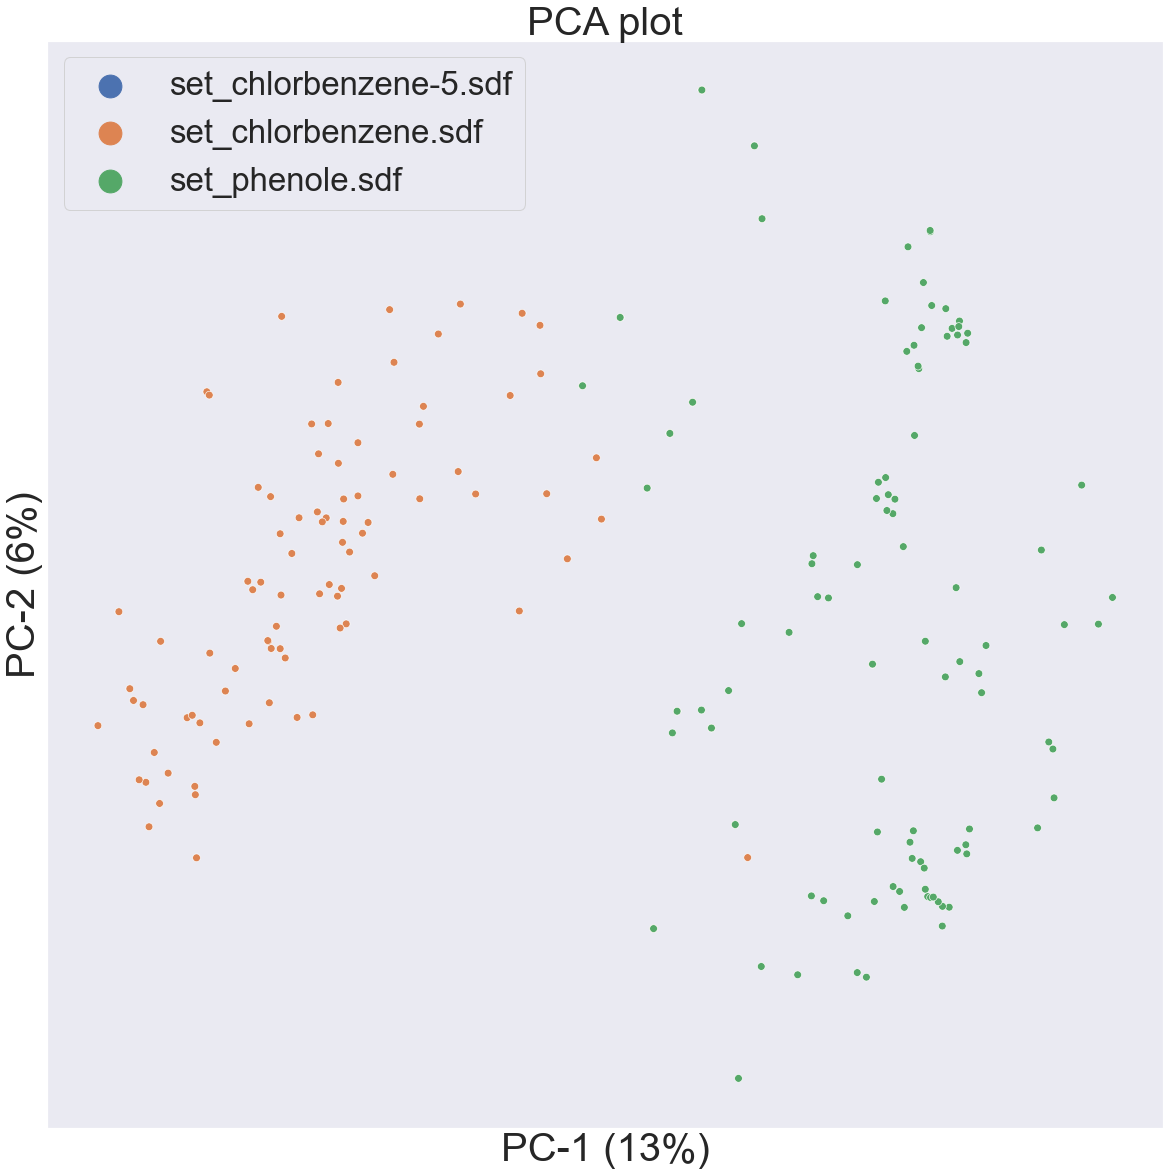

In [30]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'pca', interactive = False, fp_bits = 1024, fp_radius = 2)

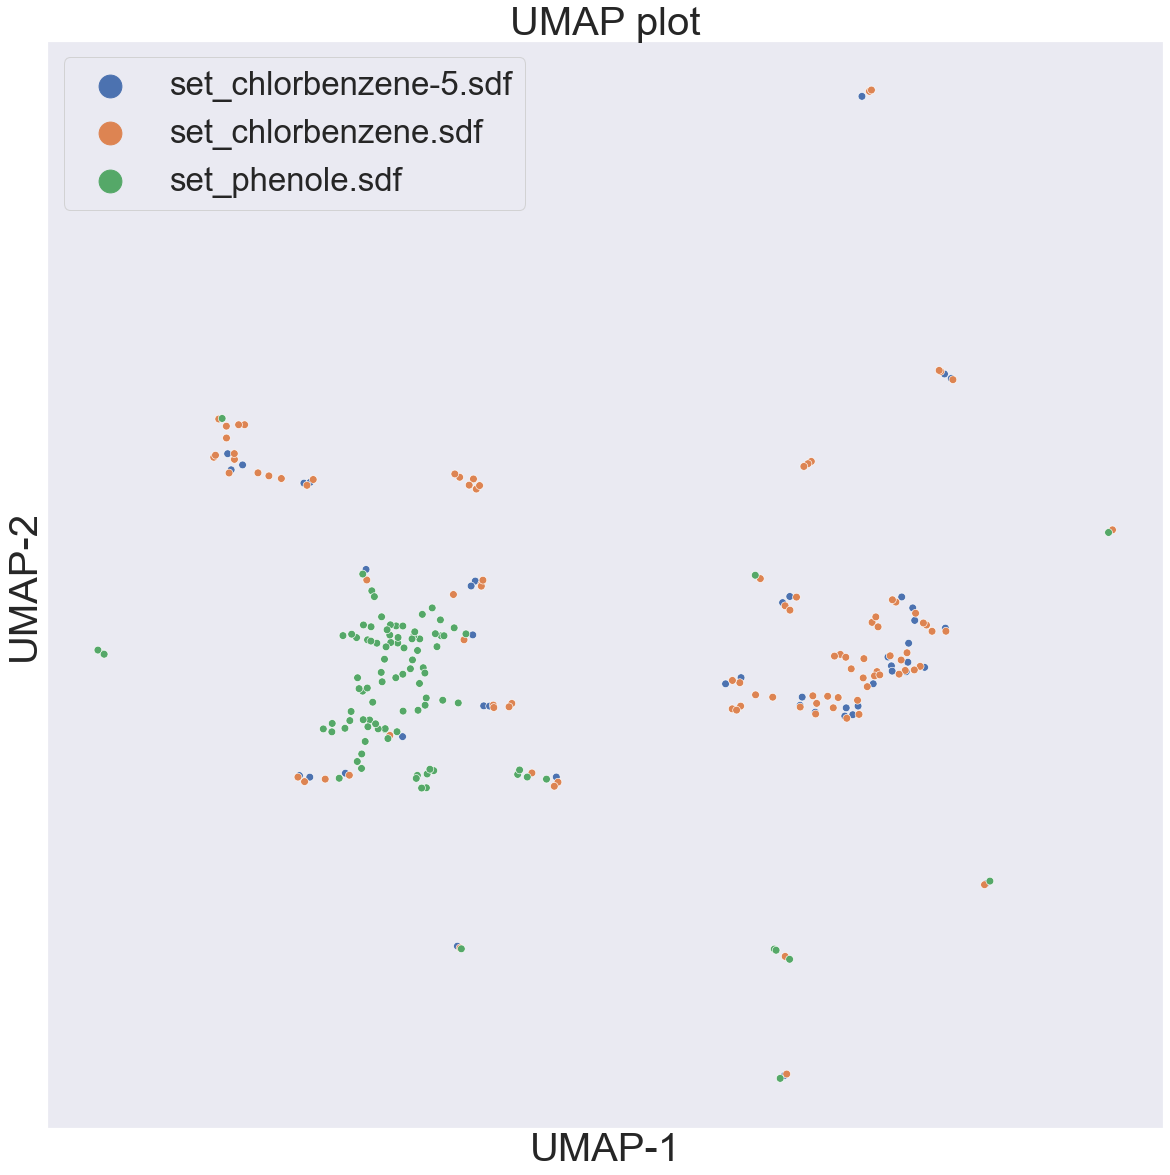

In [31]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'umap', interactive = False, fp_bits = 1024, fp_radius = 2)

C:\Users\xi59vek\.conda\envs\CDC\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\xi59vek\.conda\envs\CDC\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


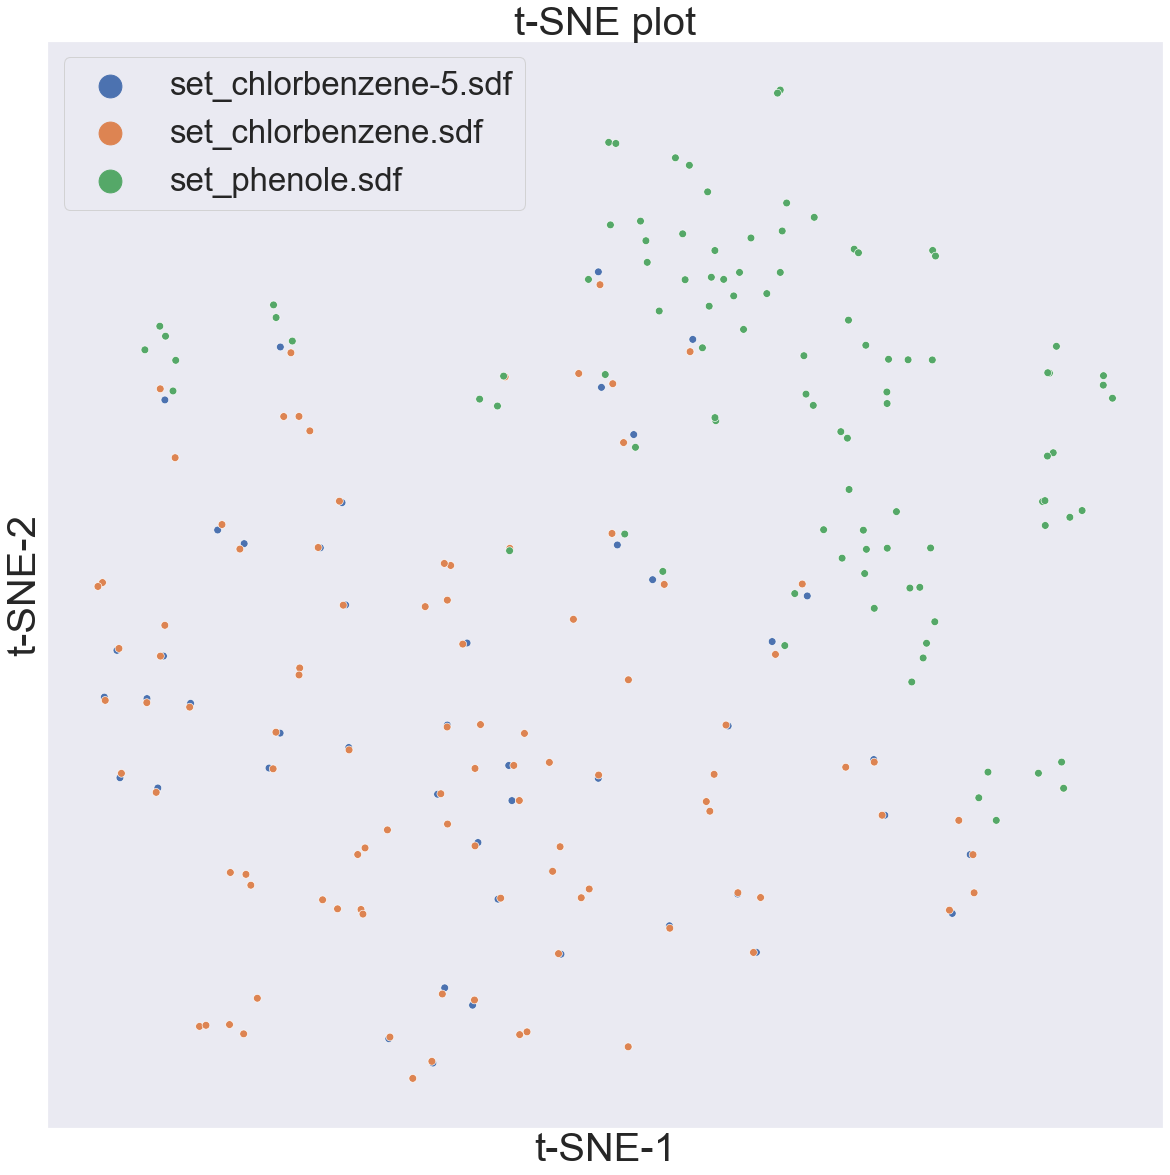

In [32]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'tsne', interactive = False, fp_bits = 1024, fp_radius = 2)

## Export  
All the calculated descriptor values can be exported into csv files for the single dataset. 

In [33]:
cider.export_single_dict_values(testdict)  

set_chlorbenzene-5.sdf : 0 exported descriptor values
set_chlorbenzene.sdf : 7 exported descriptor values
set_phenole.sdf : 7 exported descriptor values


All the created images can be saved into one pdf.

In [34]:
cider.export_all_picture_pdf()

all_images.pdf not inclued, due to unsupported image type.
